In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Cfg-data/final-project/refs/heads/master/usable_notebooks/full_country_data.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,Year,Region/Country/Area,All staff compensation as % of total expenditure in public institutions (%),Basic access to computers by level of education: Lower secondary,Basic access to computers by level of education: Primary,Basic access to computers by level of education: Upper secondary,Capital expenditure as % of total expenditure in public institutions (%),Current expenditure other than staff compensation as % of total expenditure in public institutions (%),Gross enrollment ratio - Lower secondary level (female),Gross enrollment ratio - Lower secondary level (male),...,Students enrolled in upper secondary education (thousands),Ratio of girls to boys in lower secondary education,Ratio of girls to boys in primary education,Ratio of girls to boys in upper secondary education,Teachers at lower secondary level,Teachers at primary level,Teachers at upper secondary level,Teachers with minimum required qualifications at lower secondary level,Teachers with minimum required qualifications at primary level,Teachers with minimum required qualifications at upper secondary level
0,2005,40,72.1,0.0,0.0,0.0,4.7,23.2,101.5,102.7,...,382.0,0.99,0.99,0.92,0.0,0.0,0.0,0.0,0.0,0.0
1,2005,56,85.5,0.0,0.0,0.0,2.8,11.7,178.0,155.3,...,770.0,1.13,1.00,1.09,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,100,63.2,0.0,0.0,0.0,10.1,26.7,122.5,130.6,...,373.0,0.94,0.99,0.98,0.0,0.0,0.0,0.0,0.0,0.0
3,2005,112,65.2,0.0,0.0,0.0,4.8,30.1,110.8,117.3,...,0.0,0.94,0.94,0.00,0.0,0.0,0.0,0.0,99.8,0.0
4,2005,196,76.9,0.0,0.0,0.0,13.4,9.8,95.1,94.4,...,32.0,1.01,1.00,1.05,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Drop 'Region/Country/Area' column for the features
X = df.drop(columns=['Region/Country/Area', 'Year'])

# Fill missing values (Simple Imputer)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Use 'Region/Country/Area' directly as the target for classification
y_class = df['Year']  # No encoding needed, already numeric

# Different train-test splits
splits = [0.5, 0.6, 0.7, 0.8]

In [4]:
# Iterating through different train-test splits and applying scalers
for split in splits:
    print(f"\nTrain-test split: {int(split * 100)} / {int((1 - split) * 100)}")
    
    # Train-test split for classification (Region/Country/Area)
    X_train, X_test, y_train_class, y_test_class = train_test_split(X_imputed, y_class, test_size=1-split, random_state=42)

    # Apply MinMaxScaler
    min_max_scaler = MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)

    # Apply StandardScaler
    standard_scaler = StandardScaler()
    X_train_standard = standard_scaler.fit_transform(X_train)
    X_test_standard = standard_scaler.transform(X_test)
    
    # KNN Classifier (MinMaxScaler)
    knn_class_minmax = KNeighborsClassifier(n_neighbors=5, n_jobs=1)  # Ensure single-threaded execution
    knn_class_minmax.fit(X_train_minmax, y_train_class)
    y_pred_class_minmax = knn_class_minmax.predict(X_test_minmax)

    # Evaluate KNN Classifier (MinMaxScaler)
    accuracy_minmax = accuracy_score(y_test_class, y_pred_class_minmax)
    print(f"KNN Classifier Accuracy (MinMaxScaler): {accuracy_minmax * 100:.2f}%")
    
    # KNN Classifier (StandardScaler)
    knn_class_standard = KNeighborsClassifier(n_neighbors=5, n_jobs=1)  # Ensure single-threaded execution
    knn_class_standard.fit(X_train_standard, y_train_class)
    y_pred_class_standard = knn_class_standard.predict(X_test_standard)

    # Evaluate KNN Classifier (StandardScaler)
    accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
    print(f"KNN Classifier Accuracy (StandardScaler): {accuracy_standard * 100:.2f}%")


Train-test split: 50 / 50
KNN Classifier Accuracy (MinMaxScaler): 35.71%
KNN Classifier Accuracy (StandardScaler): 28.57%

Train-test split: 60 / 40
KNN Classifier Accuracy (MinMaxScaler): 46.67%
KNN Classifier Accuracy (StandardScaler): 35.56%

Train-test split: 70 / 30
KNN Classifier Accuracy (MinMaxScaler): 52.94%
KNN Classifier Accuracy (StandardScaler): 38.24%

Train-test split: 80 / 19
KNN Classifier Accuracy (MinMaxScaler): 30.43%
KNN Classifier Accuracy (StandardScaler): 26.09%


C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não conseguiu localizar o ficheiro especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Anaconda\Lib\subprocess.py", line 153

In [5]:
# Drop 'Region/Country/Area' column for the features
X = df.drop(columns=['Region/Country/Area', 'Year'])

# Fill missing values (Simple Imputer)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Use 'Region/Country/Area' directly as the target for classification
y_class = df['Year']  # No encoding needed, already numeric

# Use 'Year' as the target for regression
y_regression = df['Year']  # For KNN Regressor

# Different train-test splits
splits = [0.5, 0.6, 0.7, 0.8]

In [6]:
# Iterating through different train-test splits and applying scalers
for split in splits:
    print(f"\nTrain-test split: {int(split * 100)} / {int((1 - split) * 100)}")
    
    # Train-test split for regression (Year)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_imputed, y_regression, test_size=1-split, random_state=42)

    # Apply MinMaxScaler
    min_max_scaler = MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train_reg)
    X_test_minmax = min_max_scaler.transform(X_test_reg)

    # Apply StandardScaler
    standard_scaler = StandardScaler()
    X_train_standard = standard_scaler.fit_transform(X_train_reg)
    X_test_standard = standard_scaler.transform(X_test_reg)
    
    # KNN Regressor (MinMaxScaler)
    knn_reg_minmax = KNeighborsRegressor(n_neighbors=5, n_jobs=1)  # Ensure single-threaded execution
    knn_reg_minmax.fit(X_train_minmax, y_train_reg)
    y_pred_reg_minmax = knn_reg_minmax.predict(X_test_minmax)

    # Evaluate KNN Regressor (MinMaxScaler)
    mse_minmax = mean_squared_error(y_test_reg, y_pred_reg_minmax)
    print(f"KNN Regressor MSE (MinMaxScaler): {mse_minmax:.2f}")
    
    # KNN Regressor (StandardScaler)
    knn_reg_standard = KNeighborsRegressor(n_neighbors=5, n_jobs=1)  # Ensure single-threaded execution
    knn_reg_standard.fit(X_train_standard, y_train_reg)
    y_pred_reg_standard = knn_reg_standard.predict(X_test_standard)

    # Evaluate KNN Regressor (StandardScaler)
    mse_standard = mean_squared_error(y_test_reg, y_pred_reg_standard)
    print(f"KNN Regressor MSE (StandardScaler): {mse_standard:.2f}")


Train-test split: 50 / 50
KNN Regressor MSE (MinMaxScaler): 16.97
KNN Regressor MSE (StandardScaler): 17.07

Train-test split: 60 / 40
KNN Regressor MSE (MinMaxScaler): 17.93
KNN Regressor MSE (StandardScaler): 16.68

Train-test split: 70 / 30
KNN Regressor MSE (MinMaxScaler): 19.39
KNN Regressor MSE (StandardScaler): 19.42

Train-test split: 80 / 19
KNN Regressor MSE (MinMaxScaler): 24.90
KNN Regressor MSE (StandardScaler): 24.75


KNN Classifier - Classification Report:
              precision    recall  f1-score   support

        2005       0.67      0.50      0.57         8
        2010       0.47      0.70      0.56        10
        2015       0.67      0.33      0.44        12
        2021       1.00      0.67      0.80         3
        2022       0.20      1.00      0.33         1

    accuracy                           0.53        34
   macro avg       0.60      0.64      0.54        34
weighted avg       0.62      0.53      0.54        34



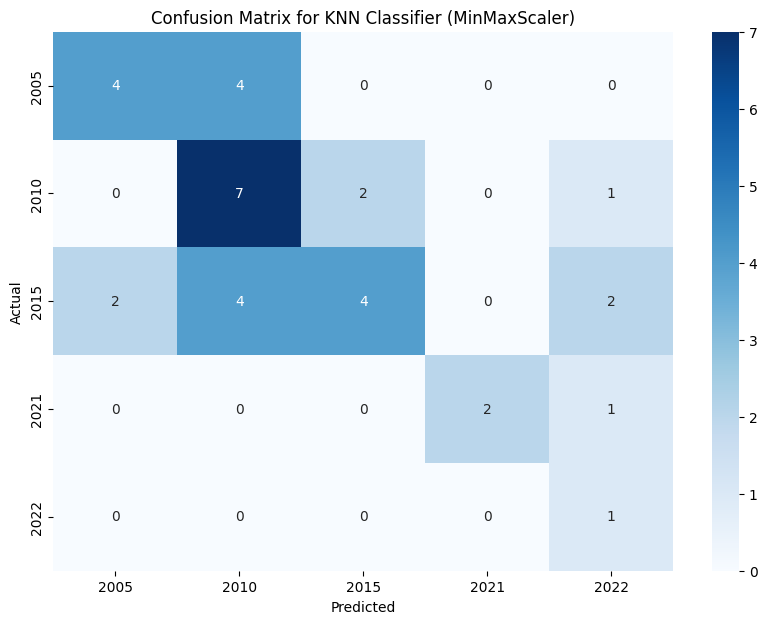

In [7]:
# Split: 70/30 for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_imputed, y_class, test_size=0.3, random_state=42)

# Apply MinMaxScaler for KNN Classifier
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_class)
X_test_minmax = min_max_scaler.transform(X_test_class)

# KNN Classifier (MinMaxScaler)
knn_class_minmax = KNeighborsClassifier(n_neighbors=5, n_jobs=1)
knn_class_minmax.fit(X_train_minmax, y_train_class)
y_pred_class_minmax = knn_class_minmax.predict(X_test_minmax)

# KNN Classifier - Classification Report
print("KNN Classifier - Classification Report:")
print(classification_report(y_test_class, y_pred_class_minmax))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class_minmax)

# Plot and save confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_class.unique(), yticklabels=y_class.unique())
plt.title('Confusion Matrix for KNN Classifier (MinMaxScaler)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(r'C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\usable_notebooks\confusion_matrix\KNN\knn_classifier_conf_matrix.png')
plt.show()

In [8]:
# Split: 60/40 for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_imputed, y_regression, test_size=0.4, random_state=42)

# Apply StandardScaler for KNN Regressor
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train_reg)
X_test_standard = standard_scaler.transform(X_test_reg)

# KNN Regressor (StandardScaler)
knn_reg_standard = KNeighborsRegressor(n_neighbors=5, n_jobs=1)
knn_reg_standard.fit(X_train_standard, y_train_reg)
y_pred_reg_standard = knn_reg_standard.predict(X_test_standard)

# KNN Regressor - Metrics
mse_standard = mean_squared_error(y_test_reg, y_pred_reg_standard)
mae_standard = mean_absolute_error(y_test_reg, y_pred_reg_standard)
r2_standard = r2_score(y_test_reg, y_pred_reg_standard)

# Check Accuracy within tolerance of 0.1
accuracy_within_tolerance = np.mean(np.abs(y_pred_reg_standard - y_test_reg) <= 0.1)

# Print KNN Regressor Report
print("\nKNN Regressor - Mean Squared Error: {:.2f}".format(mse_standard))
print("KNN Regressor - Mean Absolute Error: {:.2f}".format(mae_standard))
print("KNN Regressor - R-squared: {:.2f}".format(r2_standard))
print(f"KNN Regressor - Accuracy (within tolerance of 0.1): {accuracy_within_tolerance * 100:.2f}%")


KNN Regressor - Mean Squared Error: 16.68
KNN Regressor - Mean Absolute Error: 3.14
KNN Regressor - R-squared: 0.34
KNN Regressor - Accuracy (within tolerance of 0.1): 2.22%


In [9]:
# Use 'Region/Country/Area' directly as the target for classification
y_class = df['Region/Country/Area']

# Split: 70/30 for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_imputed, y_class, test_size=0.3, random_state=42)

# Apply StandardScaler for KNN Classifier
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train_class)
X_test_standard = standard_scaler.transform(X_test_class)

# KNN Classifier (StandardScaler)
knn_class_standard = KNeighborsClassifier(n_neighbors=5, n_jobs=1)
knn_class_standard.fit(X_train_standard, y_train_class)
y_pred_class_standard = knn_class_standard.predict(X_test_standard)

# KNN Classifier - Classification Report
print("KNN Classifier with StandardScaler - Classification Report:")
print(classification_report(y_test_class, y_pred_class_standard))

# Accuracy
accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
print(f"KNN Classifier Accuracy (StandardScaler): {accuracy_standard * 100:.2f}%")

# KNN Classifier with MinMaxScaler

# Apply MinMaxScaler for KNN Classifier
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_class)
X_test_minmax = min_max_scaler.transform(X_test_class)

# KNN Classifier (MinMaxScaler)
knn_class_minmax = KNeighborsClassifier(n_neighbors=5, n_jobs=1)
knn_class_minmax.fit(X_train_minmax, y_train_class)
y_pred_class_minmax = knn_class_minmax.predict(X_test_minmax)

# KNN Classifier - Classification Report
print("KNN Classifier with MinMaxScaler - Classification Report:")
print(classification_report(y_test_class, y_pred_class_minmax))

# Accuracy
accuracy_minmax = accuracy_score(y_test_class, y_pred_class_minmax)
print(f"KNN Classifier Accuracy (MinMaxScaler): {accuracy_minmax * 100:.2f}%")

KNN Classifier with StandardScaler - Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          56       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         0
         124       0.00      0.00      0.00         1
         191       0.20      1.00      0.33         1
         196       0.33      1.00      0.50         1
         233       0.00      0.00      0.00         1
         246       0.00      0.00      0.00         1
         276       0.00      0.00      0.00         0
         344       1.00      1.00      1.00         1
         348       0.00      0.00      0.00         1
         352       1.00      1.00      1.00         1
         372       0.00      0.00      0.00         2
         380       0.00      0.00      0.00         1
         410       0.

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [10]:
# Use 'Year' as the target for regression
y_regression = df['Year']

# Split: 60/40 for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_imputed, y_regression, test_size=0.4, random_state=42)

# Apply StandardScaler for KNN Regressor
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train_reg)
X_test_standard = standard_scaler.transform(X_test_reg)

# KNN Regressor (StandardScaler)
knn_reg_standard = KNeighborsRegressor(n_neighbors=5, n_jobs=1)
knn_reg_standard.fit(X_train_standard, y_train_reg)
y_pred_reg_standard = knn_reg_standard.predict(X_test_standard)

# KNN Regressor - Metrics
mse_standard = mean_squared_error(y_test_reg, y_pred_reg_standard)
mae_standard = mean_absolute_error(y_test_reg, y_pred_reg_standard)
r2_standard = r2_score(y_test_reg, y_pred_reg_standard)

# Check Accuracy within tolerance of 0.1
accuracy_within_tolerance_standard = np.mean(np.abs(y_pred_reg_standard - y_test_reg) <= 0.1)

# Print KNN Regressor Report
print("\nKNN Regressor with StandardScaler - Report:")
print(f"KNN Regressor - Mean Squared Error (StandardScaler): {mse_standard:.2f}")
print(f"KNN Regressor - Mean Absolute Error (StandardScaler): {mae_standard:.2f}")
print(f"KNN Regressor - R-squared (StandardScaler): {r2_standard:.2f}")
print(f"KNN Regressor - Accuracy (within tolerance of 0.1) (StandardScaler): {accuracy_within_tolerance_standard * 100:.2f}%")

# KNN Regressor with MinMaxScaler

# Apply MinMaxScaler for KNN Regressor
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_reg)
X_test_minmax = min_max_scaler.transform(X_test_reg)

# KNN Regressor (MinMaxScaler)
knn_reg_minmax = KNeighborsRegressor(n_neighbors=5, n_jobs=1)
knn_reg_minmax.fit(X_train_minmax, y_train_reg)
y_pred_reg_minmax = knn_reg_minmax.predict(X_test_minmax)

# KNN Regressor - Metrics
mse_minmax = mean_squared_error(y_test_reg, y_pred_reg_minmax)
mae_minmax = mean_absolute_error(y_test_reg, y_pred_reg_minmax)
r2_minmax = r2_score(y_test_reg, y_pred_reg_minmax)

# Check Accuracy within tolerance of 0.1
accuracy_within_tolerance_minmax = np.mean(np.abs(y_pred_reg_minmax - y_test_reg) <= 0.1)

# Print KNN Regressor Report
print("\nKNN Regressor with MinMaxScaler - Report:")
print(f"KNN Regressor - Mean Squared Error (MinMaxScaler): {mse_minmax:.2f}")
print(f"KNN Regressor - Mean Absolute Error (MinMaxScaler): {mae_minmax:.2f}")
print(f"KNN Regressor - R-squared (MinMaxScaler): {r2_minmax:.2f}")
print(f"KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): {accuracy_within_tolerance_minmax * 100:.2f}%")


KNN Regressor with StandardScaler - Report:
KNN Regressor - Mean Squared Error (StandardScaler): 16.68
KNN Regressor - Mean Absolute Error (StandardScaler): 3.14
KNN Regressor - R-squared (StandardScaler): 0.34
KNN Regressor - Accuracy (within tolerance of 0.1) (StandardScaler): 2.22%

KNN Regressor with MinMaxScaler - Report:
KNN Regressor - Mean Squared Error (MinMaxScaler): 17.93
KNN Regressor - Mean Absolute Error (MinMaxScaler): 3.32
KNN Regressor - R-squared (MinMaxScaler): 0.29
KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): 2.22%


In [11]:
# Check the shape of the training features and target
print("X_train_standard shape:", X_train_standard.shape)
print("y_train_class shape:", y_train_class.shape)

X_train_standard shape: (66, 24)
y_train_class shape: (77,)


In [12]:
# Assuming X_imputed is your features and y_class is your target
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_imputed, y_class, test_size=0.4, random_state=42)

In [13]:
print("X_train_standard shape:", X_train_standard.shape)
print("y_train_class shape:", y_train_class.shape)

X_train_standard shape: (66, 24)
y_train_class shape: (66,)


In [14]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],               # Number of neighbors to use
    'weights': ['uniform', 'distance'],            # Weight function for prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Distance metric
}

grid_search_standard = GridSearchCV(knn_class_standard, param_grid, cv=3, scoring='accuracy')
grid_search_standard.fit(X_train_standard, y_train_class)

# Best hyperparameters from GridSearchCV
print(f"Best hyperparameters for StandardScaler: {grid_search_standard.best_params_}")

# Get the best model
best_knn_class_standard = grid_search_standard.best_estimator_

# Predict using the best model
y_pred_class_standard = best_knn_class_standard.predict(X_test_standard)

# Classification report and accuracy
print("KNN Classifier with StandardScaler - Classification Report:")
print(classification_report(y_test_class, y_pred_class_standard))

accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
print(f"KNN Classifier Accuracy (StandardScaler): {accuracy_standard * 100:.2f}%")

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters for StandardScaler: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNN Classifier with StandardScaler - Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         3
          56       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         1
         191       0.00      0.00      0.00         1
         196       0.00      0.00      0.00         2
         203       0.00      0.00      0.00         1
         233       0.00      0.00      0.00         1
         246       0.00      0.00      0.00         1
         268       0.00      0.00      0.00         1
         276       0.00      0.00      0.00         1
         344       0.00      0.00      0.00         1
         348       1.00      1.00      1.00         1
         352       1.00

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [15]:
# Apply MinMaxScaler for KNN Regressor
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_reg)
X_test_minmax = min_max_scaler.transform(X_test_reg)

# Define the KNN Regressor
knn_reg_minmax = KNeighborsRegressor(n_jobs=1)

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weights for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_minmax = GridSearchCV(knn_reg_minmax, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_minmax.fit(X_train_minmax, y_train_reg)

# Get the best hyperparameters
print(f"Best hyperparameters for MinMaxScaler: {grid_search_minmax.best_params_}")

# Get the best model
best_knn_reg_minmax = grid_search_minmax.best_estimator_

# Predict using the best model
y_pred_reg_minmax = best_knn_reg_minmax.predict(X_test_minmax)

# KNN Regressor - Metrics
mse_minmax = mean_squared_error(y_test_reg, y_pred_reg_minmax)
mae_minmax = mean_absolute_error(y_test_reg, y_pred_reg_minmax)
r2_minmax = r2_score(y_test_reg, y_pred_reg_minmax)

# Check Accuracy within tolerance of 0.1
accuracy_within_tolerance_minmax = np.mean(np.abs(y_pred_reg_minmax - y_test_reg) <= 0.1)

# Print KNN Regressor Report
print("\nKNN Regressor with MinMaxScaler - Report:")
print(f"KNN Regressor - Mean Squared Error (MinMaxScaler): {mse_minmax:.2f}")
print(f"KNN Regressor - Mean Absolute Error (MinMaxScaler): {mae_minmax:.2f}")
print(f"KNN Regressor - R-squared (MinMaxScaler): {r2_minmax:.2f}")
print(f"KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): {accuracy_within_tolerance_minmax * 100:.2f}%")

Best hyperparameters for MinMaxScaler: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

KNN Regressor with MinMaxScaler - Report:
KNN Regressor - Mean Squared Error (MinMaxScaler): 15.93
KNN Regressor - Mean Absolute Error (MinMaxScaler): 3.14
KNN Regressor - R-squared (MinMaxScaler): 0.37
KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): 0.00%


In [16]:
class_distribution = pd.Series(y_train_class).value_counts()

# Identify classes with only 1 sample
classes_to_remove = class_distribution[class_distribution == 1].index

# Filter out the classes with only 1 sample
X_train_filtered = X_train_standard[~y_train_class.isin(classes_to_remove)]
y_train_filtered = y_train_class[~y_train_class.isin(classes_to_remove)]

# Apply SMOTE to the filtered data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# KNN Classifier with GridSearchCV
knn_class = KNeighborsClassifier()
grid_search_standard = GridSearchCV(knn_class, param_grid, cv=3, scoring='accuracy')
grid_search_standard.fit(X_resampled, y_resampled)

# Best hyperparameters from GridSearchCV
print(f"Best hyperparameters for StandardScaler with SMOTE: {grid_search_standard.best_params_}")

# Get the best model
best_knn_class_standard = grid_search_standard.best_estimator_

# Predict using the best model
y_pred_class_standard = best_knn_class_standard.predict(X_test_standard)

# Classification report and accuracy
print("KNN Classifier with StandardScaler and SMOTE - Classification Report:")
print(classification_report(y_test_class, y_pred_class_standard))

accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
print(f"KNN Classifier Accuracy (StandardScaler and SMOTE): {accuracy_standard * 100:.2f}%")

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best hyperparameters for StandardScaler with SMOTE: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Classifier with StandardScaler and SMOTE - Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         3
          56       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         0
         124       0.00      0.00      0.00         1
         191       0.00      0.00      0.00         1
         196       0.00      0.00      0.00         2
         203       0.00      0.00      0.00         1
         233       0.00      0.00      0.00         1
         246       0.00      0.00      0.00         1
         268       0.00      0.00      0.00         1
         276       0.00      0.00      0.00         1
         344       0.25      1.00      0.40         1
  

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [17]:
# Apply RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_standard, y_train_class)

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# KNN Classifier with GridSearchCV
knn_class = KNeighborsClassifier()
grid_search_standard = GridSearchCV(knn_class, param_grid, cv=3, scoring='accuracy')
grid_search_standard.fit(X_resampled, y_resampled)

# Best hyperparameters from GridSearchCV
print(f"Best hyperparameters for KNN with RandomOverSampler: {grid_search_standard.best_params_}")

# Get the best model
best_knn_class_standard = grid_search_standard.best_estimator_

# Predict using the best model
y_pred_class_standard = best_knn_class_standard.predict(X_test_standard)

# Classification report and accuracy
print("KNN Classifier with RandomOverSampler - Classification Report:")
print(classification_report(y_test_class, y_pred_class_standard))

accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
print(f"KNN Classifier Accuracy (RandomOverSampler): {accuracy_standard * 100:.2f}%")

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Best hyperparameters for KNN with RandomOverSampler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Classifier with RandomOverSampler - Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         3
          56       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         1
         191       0.00      0.00      0.00         1
         196       0.00      0.00      0.00         2
         203       1.00      1.00      1.00         1
         233       0.00      0.00      0.00         1
         246       0.00      0.00      0.00         1
         268       0.00      0.00      0.00         1
         276       0.00      0.00      0.00         1
         344       0.00      0.00      0.00         1
         348       0.17      1.00      0.29         1
        

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [18]:
# Class Weights for Imbalance Handling
knn_class_standard = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')

# Fit on training data
knn_class_standard.fit(X_train_standard, y_train_class)

# Predict and evaluate
y_pred_class_standard = knn_class_standard.predict(X_test_standard)
print("KNN Classifier with StandardScaler - Classification Report:")
print(classification_report(y_test_class, y_pred_class_standard))

accuracy_standard = accuracy_score(y_test_class, y_pred_class_standard)
print(f"KNN Classifier Accuracy (StandardScaler with Class Weights): {accuracy_standard * 100:.2f}%")

KNN Classifier with StandardScaler - Classification Report:
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         3
          56       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         1
         191       0.00      0.00      0.00         1
         196       0.00      0.00      0.00         2
         203       0.00      0.00      0.00         1
         233       0.00      0.00      0.00         1
         246       0.00      0.00      0.00         1
         268       0.00      0.00      0.00         1
         276       0.00      0.00      0.00         1
         344       0.00      0.00      0.00         1
         348       1.00      1.00      1.00         1
         352       1.00      1.00      1.00         2
         372       0.00      0.00      0.00         2
         380       0.

C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [19]:
# Cross-validation with hyperparameters
cv_scores = cross_val_score(best_knn_class_standard, X_train_standard, y_train_class, cv=3)  # 3-fold CV
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.31818182 0.40909091 0.31818182]
Mean CV score: 0.35


C:\Users\Cecilia\Downloads\ironhack\coursework\Final_Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [20]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}

# KNN Regressor with GridSearchCV
knn_reg = KNeighborsRegressor()
grid_search_minmax = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_minmax.fit(X_train_minmax, y_train_reg)

# Best hyperparameters from GridSearchCV
print(f"Best hyperparameters for MinMaxScaler: {grid_search_minmax.best_params_}")

# Get the best model
best_knn_reg_minmax = grid_search_minmax.best_estimator_

# Predict using the best model
y_pred_reg_minmax = best_knn_reg_minmax.predict(X_test_minmax)

# Evaluate the model
mse_minmax = mean_squared_error(y_test_reg, y_pred_reg_minmax)
mae_minmax = mean_absolute_error(y_test_reg, y_pred_reg_minmax)
r2_minmax = r2_score(y_test_reg, y_pred_reg_minmax)

# Accuracy within tolerance of 0.1
accuracy_within_tolerance_minmax = np.mean(np.abs(y_pred_reg_minmax - y_test_reg) <= 0.1)

# Print KNN Regressor Report
print("\nKNN Regressor with MinMaxScaler - Report:")
print(f"KNN Regressor - Mean Squared Error (MinMaxScaler): {mse_minmax:.2f}")
print(f"KNN Regressor - Mean Absolute Error (MinMaxScaler): {mae_minmax:.2f}")
print(f"KNN Regressor - R-squared (MinMaxScaler): {r2_minmax:.2f}")
print(f"KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): {accuracy_within_tolerance_minmax * 100:.2f}%")

Best hyperparameters for MinMaxScaler: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

KNN Regressor with MinMaxScaler - Report:
KNN Regressor - Mean Squared Error (MinMaxScaler): 15.93
KNN Regressor - Mean Absolute Error (MinMaxScaler): 3.14
KNN Regressor - R-squared (MinMaxScaler): 0.37
KNN Regressor - Accuracy (within tolerance of 0.1) (MinMaxScaler): 0.00%


## START of ENSEMBLE MODELS

In [21]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_minmax, y_train_reg)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test_minmax)

# Evaluation metrics
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Accuracy within tolerance of 0.1
accuracy_within_tolerance_rf = np.mean(np.abs(y_pred_rf - y_test_reg) <= 0.1)

# Print Random Forest Report
print("\nRandom Forest Regressor - Report:")
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")
print(f"Random Forest - Accuracy (within tolerance of 0.1): {accuracy_within_tolerance_rf * 100:.2f}%")


Random Forest Regressor - Report:
Random Forest - Mean Squared Error: 13.41
Random Forest - Mean Absolute Error: 3.05
Random Forest - R-squared: 0.47
Random Forest - Accuracy (within tolerance of 0.1): 0.00%


In [22]:
# Define base models for stacking
base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=7, metric='euclidean')),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit and predict
stacked_model.fit(X_train_minmax, y_train_reg)
y_pred_stacked = stacked_model.predict(X_test_minmax)

# Evaluation metrics
mse_stacked = mean_squared_error(y_test_reg, y_pred_stacked)
mae_stacked = mean_absolute_error(y_test_reg, y_pred_stacked)
r2_stacked = r2_score(y_test_reg, y_pred_stacked)

# Accuracy within tolerance of 0.1
accuracy_within_tolerance_stacked = np.mean(np.abs(y_pred_stacked - y_test_reg) <= 0.1)

# Print Stacked Model Report
print("\nStacked Regressor - Report:")
print(f"Stacked Regressor - Mean Squared Error: {mse_stacked:.2f}")
print(f"Stacked Regressor - Mean Absolute Error: {mae_stacked:.2f}")
print(f"Stacked Regressor - R-squared: {r2_stacked:.2f}")
print(f"Stacked Regressor - Accuracy (within tolerance of 0.1): {accuracy_within_tolerance_stacked * 100:.2f}%")


Stacked Regressor - Report:
Stacked Regressor - Mean Squared Error: 13.26
Stacked Regressor - Mean Absolute Error: 3.03
Stacked Regressor - R-squared: 0.47
Stacked Regressor - Accuracy (within tolerance of 0.1): 0.00%
